In [2]:
%matplotlib inline
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.onnx as onnx
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
train_data = datasets.MNIST(
    root='data',
    transform=ToTensor(),
    train=True,
    download=True
)

test_data = datasets.MNIST(
    root='data',
    transform=ToTensor(),
    train=False,
    download=True
)

In [3]:
train_data.data.shape

torch.Size([60000, 28, 28])

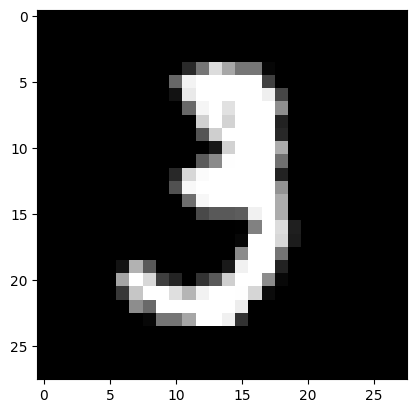

In [4]:
plt.imshow(train_data.data[10], cmap='gray')

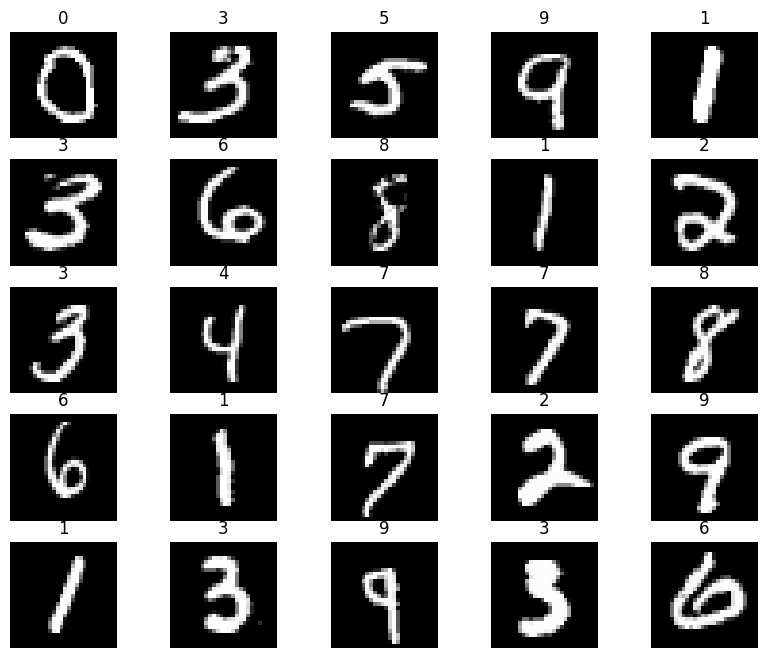

In [5]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
train_loader = DataLoader(train_data, 64, shuffle=True)
test_loader = DataLoader(test_data, 64, shuffle=True)

In [7]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.network = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU(),
        )

    def forward(self, x):
        return self.network(self.flatten(x))

In [8]:
model = Model()
model

Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (network): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

In [9]:
def train(data):
    for X, y in data:
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [10]:
def test(data):
    size = len(data.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in data:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [11]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(160):
    print(f"Epoch {epoch}:")
    train(train_loader)
    test(test_loader)


Epoch 0:
Accuracy: 78.6%, Avg loss: 0.013034 

Epoch 1:
Accuracy: 88.8%, Avg loss: 0.006438 

Epoch 2:
Accuracy: 90.2%, Avg loss: 0.005407 

Epoch 3:
Accuracy: 91.5%, Avg loss: 0.004721 

Epoch 4:
Accuracy: 92.1%, Avg loss: 0.004448 

Epoch 5:
Accuracy: 92.6%, Avg loss: 0.004137 

Epoch 6:
Accuracy: 93.0%, Avg loss: 0.003848 

Epoch 7:
Accuracy: 93.6%, Avg loss: 0.003587 

Epoch 8:
Accuracy: 93.9%, Avg loss: 0.003371 

Epoch 9:
Accuracy: 94.3%, Avg loss: 0.003185 

Epoch 10:
Accuracy: 94.3%, Avg loss: 0.003033 

Epoch 11:
Accuracy: 94.6%, Avg loss: 0.002900 

Epoch 12:
Accuracy: 94.7%, Avg loss: 0.002829 

Epoch 13:
Accuracy: 95.1%, Avg loss: 0.002586 

Epoch 14:
Accuracy: 95.3%, Avg loss: 0.002495 

Epoch 15:
Accuracy: 95.5%, Avg loss: 0.002344 

Epoch 16:
Accuracy: 95.7%, Avg loss: 0.002312 

Epoch 17:
Accuracy: 95.9%, Avg loss: 0.002214 

Epoch 18:
Accuracy: 96.0%, Avg loss: 0.002107 

Epoch 19:
Accuracy: 96.1%, Avg loss: 0.002062 

Epoch 20:
Accuracy: 96.3%, Avg loss: 0.001957 

Ep

In [12]:
len(train_loader)

938

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

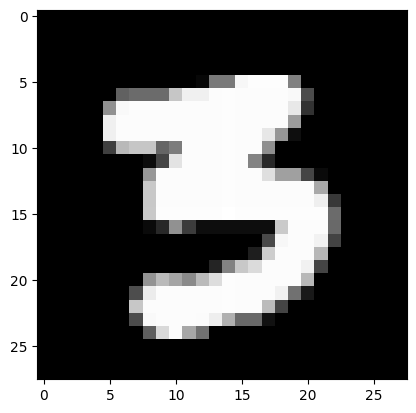

In [34]:
sample = next(iter(test_loader))[0][61][0]

print(sample)
prediction = model(sample.unsqueeze(0).unsqueeze(0))
print(prediction.argmax().item())

plt.imshow(sample, cmap='gray')

In [14]:
input_image = torch.zeros((1,28,28))
onnx.export(model, input_image, '../service/model.onnx')

In [39]:
model.state_dict()

OrderedDict([('network.0.weight',
              tensor([[ 0.0294,  0.0321,  0.0131,  ...,  0.0167,  0.0284, -0.0027],
                      [ 0.0171,  0.0146, -0.0275,  ...,  0.0312,  0.0035,  0.0232],
                      [ 0.0078, -0.0200,  0.0065,  ...,  0.0152, -0.0243, -0.0135],
                      ...,
                      [-0.0256,  0.0109, -0.0132,  ..., -0.0282,  0.0342, -0.0120],
                      [-0.0033,  0.0136,  0.0081,  ...,  0.0225,  0.0015,  0.0171],
                      [-0.0160,  0.0172, -0.0210,  ..., -0.0180, -0.0220, -0.0008]])),
             ('network.0.bias',
              tensor([ 9.5667e-02, -3.5619e-02, -1.8822e-02,  2.8488e-02,  1.5051e-02,
                       3.2363e-02, -1.4678e-02, -2.7401e-03,  4.4184e-02, -1.9923e-02,
                       1.5472e-02, -2.8586e-02, -7.6409e-02, -3.3045e-02, -5.8960e-04,
                      -4.2847e-02,  3.7778e-02, -2.2355e-02,  7.2057e-02, -3.3432e-02,
                      -5.6037e-02,  1.5148e-02,  4.4